In [11]:
insured_neg_question_table = np.array([
                              "insured_neg_yng_adult_life","insured_neg_yng_adult_car","insured_neg_yng_adult_dental","insured_neg_yng_adult_health","insured_neg_yng_adult_disability",
                              "insured_neg_middle-age_life","insured_neg_middle-age_car","insured_neg_middle-age_dental","insured_neg_middle-age_health","insured_neg_middle-age_disability",
                              "insured_neg_old-age_life","insured_neg_old-age_car","insured_neg_old-age_dental","insured_neg_old-age_health","insured_neg_old-age_disability"
                               ])

insured_pos_question_table = np.array([
                              "insured_pos_yng_adult_life","insured_pos_yng_adult_car","insured_pos_yng_adult_dental","insured_pos_yng_adult_health","insured_pos_yng_adult_disability",
                              "insured_pos_middle-age_life","insured_pos_middle-age_car","insured_pos_middle-age_dental","insured_pos_middle-age_health","insured_pos_middle-age_disability",
                              "insured_pos_old-age_life","insured_pos_old-age_car","insured_pos_old-age_dental","insured_pos_old-age_health","insured_pos_old-age_disability"
                               ])

open_question_table = np.array([
                              "open_yng_adult_life","open_yng_adult_car","open_yng_adult_dental","open_yng_adult_health","open_yng_adult_disability",
                              "open_middle-age_life","open_middle-age_car","open_middle-age_dental","open_middle-age_health","open_middle-age_disability",
                              "open_old-age_life","open_old-age_car","open_old-age_dental","open_old-age_health","open_old-age_disability"
                               ])
close = np.array(["Is the Customer Interested?"])


def get_action_dict(open_question_table,insured_pos_question_table,insured_neg_question_table):
    
    action_dict = dict({"open":{"young_adult": {val:idx for idx, val in enumerate(open_question_table[0])},
                "middle_age":{val:idx for idx, val in enumerate(open_question_table[1],len(open_question_table[1]))},
                "old-age":{val:idx for idx, val in enumerate(open_question_table[2],2*len(open_question_table[2]))}},
         "insured_pos":{"young_adult": {val:idx for idx, val in enumerate(insured_pos_question_table[0],3*len(insured_pos_question_table[2]))},
                "middle_age":{val:idx for idx, val in enumerate(insured_pos_question_table[1],4*len(insured_pos_question_table[1]))},
                "old-age":{val:idx for idx, val in enumerate(insured_pos_question_table[2],5*len(insured_pos_question_table[2]))}},
         "insured_neg":{"young_adult": {val:idx for idx, val in enumerate(insured_neg_question_table[0],6*len(insured_neg_question_table[0]))},
                "middle_age":{val:idx for idx, val in enumerate(insured_neg_question_table[1],7*len(insured_neg_question_table[1]))},
                "old-age":{val:idx for idx, val in enumerate(insured_neg_question_table[2],8*len(insured_neg_question_table[2]))}},
                       "close":{"all":{"Is the Customer Interested?":45}} })
    return action_dict
action_map = pd.read_csv("actions.csv")

In [12]:
class User:
    def __init__(self, user_class, item_class, action_map):
        self.name="Simulated-user"
        self.user_class = user_class
        self.item_class = item_class
        self.action_map = action_map
        print("---------------New User--------------------")
        if self.user_class == 0:
            uc_string = 'Young Adult'
        if self.user_class == 1:
            uc_string = "Middle Age"
        if self.user_class == 2:
            uc_string = "Old Age"
        if self.item_class == 0:
            ic_string = "Life"
        if self.item_class == 1:
            ic_string = "Car"            
        if self.item_class == 2:
            ic_string = "Dental"            
        if self.item_class == 3:
            ic_string = "Health"            
        if self.item_class == 4:
            ic_string = "Disability"
        print("USER CLASS :",uc_string,"  " ,"ITEM CLASS :",ic_string)
        self.state = 0
        self.prev_response = 0
        self.is_insured = 0
        
    def print_user_speech(self):
        if self.prev_response == 1:
            print("USER SAID YES")
        elif self.prev_response == 0:
            print("USER SAID NO")
            
    def parse_resp(self,resp):
        if resp == ('Y' or 'y' or 'YES' or 'yes'):
            print("User Says : YES")
            cont = True
            return 1,cont
        if resp == ('N' or 'n' or 'NO' or 'no'):
            print("User Says : NO")
            cont = True
            return 0,cont
        else:
            print("Could not parse input try again")
            cont = False
            return 5,cont
        
    def respond(self,action):
        print("Bot Says : ",action_map[action_map['qid']==action]['question'].values)
#         print("Please Input your response - (Y/N)")
#         cont = False
#         while not cont:
#             key = input('-->')
#             response,cont = self.parse_resp(key)
            
#         self.prev_response = response
        if (self.state == 0):
            if action in self.action_map[(self.action_map['user_class_id']== self.user_class) &
                                         (self.action_map['item_class_id']== self.item_class)& 
                                         (self.action_map['state']== 'open')
                                        ]['qid'].values:
                self.prev_response = 1
                self.print_user_speech()
                self.state = 1
                reward = 0.1
                return(self.state, self.prev_response, reward)
            else:
                self.prev_response = 0
                self.print_user_speech()
                self.state = 0
                reward = -1
                return(self.state, self.prev_response, reward)
        
        if (self.state == 1):
            if action in self.action_map[(self.action_map['user_class_id']== self.user_class) &
                                         (self.action_map['item_class_id']== self.item_class)&
                                         (self.action_map['state']== 'ask')]['qid'].values:
                self.prev_response = 1
                self.print_user_speech()
                self.state = 2
                reward = 0.1
                return(self.state, self.prev_response, reward)
            else:
                self.prev_response = 0
                self.print_user_speech()
                self.state = 1
                reward = -1
                return(self.state, self.prev_response, reward)
        
        if (self.state == 2):
            if action in self.action_map[(self.action_map['state']== 'close')]['qid'].values:
                self.prev_response = 1
                self.print_user_speech()
                self.state = 4
                reward = 1
                return(self.state, self.prev_response, reward)
            else:
                self.prev_response = 0
                self.print_user_speech()
                self.state = 2
                reward = -1
                return(self.state, self.prev_response, reward)

            
#     def respond(self,action):
#         print("Bot Says : ",action_map[action_map['ID']==action]['Question'].values)
#         print("Please Input your response - (Y/N)")
#         cont = False
#         while not cont:
#             key = input('-->')
#             response,cont = self.parse_resp(key)
            
#         self.prev_response = response
        
#         if (self.state == 0):
#             if self.prev_response == 1: 
#                 self.state = 1
#                 reward = 0.1
#                 return(self.state, self.prev_response, reward)
#             elif self.prev_response == 0:
#                 self.state = 0
#                 reward = -1
#                 return(self.state, self.prev_response, reward)
        
#         if (self.state == 1):
#             if self.prev_response == 1: 
#                 self.state = 2
#                 reward = 0.1
#                 return(self.state, self.prev_response, reward)
#             elif self.prev_response == 0:
#                 self.state = 1
#                 reward = -1
#                 return(self.state, self.prev_response, reward)
        
#         if (self.state == 2):
#             if self.prev_response == 1: 
#                 self.state = 4
#                 reward = 1
#                 return(self.state, self.prev_response, reward)
#             elif self.prev_response == 0:
#                 self.state = 3
#                 reward = -1
#                 return(self.state, self.prev_response, reward)


In [13]:
class Environment:
    def __init__(self, uclass, iclass):
        self.name="Chat-Environment"

        self.user_class = uclass
        self.item_class = iclass

        self.prev_response = 0

        # {open:0, ask:1, close:2}
        self.dialog_state_dict = {"open":0, "ask":1, "close":2, "closed_0":3, "closed_1":4}
        self.dialog_state = 0
        self.is_insured = 0

        # State and Action Space
        self.action_map = pd.read_csv("actions_new.csv")

        self.N_actions = len(self.action_map['qid'].values)
        print("No. actions:", self.N_actions)

        self.state_dim = len([self.user_class,
                        self.item_class,
                        self.dialog_state])

        self.reward = 0
        self.state = None
            
            
    def define_rewards(self):
        if(self.dialog_state == 4):
            reward = 1
            return reward
        elif(self.dialog_state == 3):
            reward = -0.1
            return reward
        else:
            reward = 0
            return reward
        
    def allowed_actions(self, action_probs):
        actions = np.array([])
        allowed_action_probs = np.array([])
        allowed_action_prob_dict = {}
        dialog_state = self.state[3]
        if (dialog_state == 0 ):
            allowed_actions = np.array(self.action_map[(self.action_map['user_class_id']== self.user_class) & (self.action_map['item_class_id']== self.item_class)& (self.action_map['state']== 'open')]['qid'].values)
            for action in allowed_actions:
                allowed_action_prob_dict[action] = action_probs[action]
            return allowed_actions, allowed_action_prob_dict
        
        elif (dialog_state == 1):
            allowed_actions = np.array(self.action_map[(self.action_map['user_class_id']== self.user_class) & (self.action_map['item_class_id']== self.item_class)& (self.action_map['state']== 'ask')]['qid'].values)
            for action in allowed_actions:
                allowed_action_prob_dict[action] = action_probs[action]
            return allowed_actions, allowed_action_prob_dict

        elif (dialog_state == 2):
            allowed_actions = np.array(self.action_map[(self.action_map['state']== 'close')]['qid'].values)
            for action in allowed_actions:
                allowed_action_prob_dict[action] = action_probs[action]
            return allowed_actions, allowed_action_prob_dict

        else:
            print("Dialog state is wrong or terminal state is reached")
            return actions,allowed_action_prob_dict
    
    def reset(self,U,I):
        print("\n---------------ENV RESET--------------------")
        self.state = [U,I,0,0]
        self.user_class = U
        self.item_class = I
        self.dialog_state = 0
        self.prev_response = 0
        return np.array(self.state).flatten()
    
    def is_terminal(self, state):
        if((state[3] == 3) | (state[3] == 4)):
            return 1
        else:
            return 0
        
    def step(self, action, user):
        print("Bot said ",action)
        next_dialog_state, prev_response, reward = user.respond(action)
        self.reward = reward
        self.dialog_state = next_dialog_state
        self.prev_response = prev_response
        self.state = [self.user_class,
                        self.item_class,
                        self.prev_response,
                        self.dialog_state]
        done = self.is_terminal(self.state)
        if done == 1:
            done = True
        else:
            done = False
        
        return np.array(self.state), done, self.reward
    

        
        
        
        
        
            
            

In [14]:

env = Environment(0,0)

No. actions: 46


In [15]:
class PolicyEstimator():
    """
    Policy Function approximator. 
    """
    
    def __init__(self, learning_rate=0.01, scope="policy_estimator"):
        with tf.variable_scope(scope):
            self.state = tf.placeholder(tf.float32, [None,int(env.state_dim)], "state")
            self.action = tf.placeholder(dtype=tf.int32, name="action")
            self.target = tf.placeholder(dtype=tf.float32, name="target")

            # This is just table lookup estimator
#             state_one_hot = tf.one_hot(self.state, int(env.state_dim))
#             print("ONE HOT STATE", state_one_hot)


            h1 = tf.layers.dense(self.state, 24, activation=tf.nn.relu)
            h2 = tf.layers.dense(h1, 48, activation=tf.nn.relu)
            h3 = tf.layers.dense(h2, 24, activation=tf.nn.relu)
            self.output_layer = tf.layers.dense(h3, env.N_actions)
#             outputs = tf.nn.softmax(logits)

#             self.output_layer = tf.contrib.layers.fully_connected(
#                 inputs=self.state,
#                 num_outputs=env.N_actions,
#                 activation_fn=None,
#                 weights_initializer=tf.zeros_initializer)
            print("OUTPUT LAYER",self.output_layer)

            self.action_probs = tf.squeeze(tf.nn.softmax(self.output_layer))
            print("In Estimator Action Probs:",self.action_probs)
            print("Shape", self.action_probs.shape)
            self.picked_action_prob = tf.gather(self.action_probs, self.action)

            # Loss and train op
            self.loss = -tf.log(self.picked_action_prob) * self.target

            self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            self.train_op = self.optimizer.minimize(
                self.loss, global_step=tf.contrib.framework.get_global_step())
    
    def predict(self, state, sess=None):
        sess = sess or tf.get_default_session()
        return sess.run(self.action_probs, { self.state: state })

    def update(self, state, target, action, sess=None):
        sess = sess or tf.get_default_session()
        feed_dict = { self.state: state, self.target: target, self.action: action  }
        _, loss = sess.run([self.train_op, self.loss], feed_dict)
        return loss

In [16]:
class ValueEstimator():
    """
    Value Function approximator. 
    """
    
    def __init__(self, learning_rate=0.01, scope="value_estimator"):
        with tf.variable_scope(scope):
            self.state = tf.placeholder(tf.float32, [None,int(env.state_dim)], "state")
            self.target = tf.placeholder(dtype=tf.float32, name="target")


            
#             state_one_hot = tf.one_hot(self.state, int(env.state_dim))

            h1 = tf.layers.dense(self.state, 24, activation=tf.nn.relu)
            h2 = tf.layers.dense(h1, 48, activation=tf.nn.relu)
            h3 = tf.layers.dense(h2, 24, activation=tf.nn.relu)
            self.output_layer = tf.layers.dense(h3, 1)



            self.value_estimate = tf.squeeze(self.output_layer)
            self.loss = tf.squared_difference(self.value_estimate, self.target)

            self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            self.train_op = self.optimizer.minimize(
                self.loss, global_step=tf.contrib.framework.get_global_step())        
    
    def predict(self, state, sess=None):
        sess = sess or tf.get_default_session()
        return sess.run(self.value_estimate, { self.state: state })

    def update(self, state, target, sess=None):
        sess = sess or tf.get_default_session()
        feed_dict = { self.state: state, self.target: target }
        _, loss = sess.run([self.train_op, self.loss], feed_dict)
        return loss

In [17]:
def actor_critic(env, estimator_policy, estimator_value, num_episodes, discount_factor=1.0):
    """
    Actor Critic Algorithm. Optimizes the policy 
    function approximator using policy gradient.
    
    Args:
        env: OpenAI environment.
        estimator_policy: Policy Function to be optimized 
        estimator_value: Value function approximator, used as a critic
        num_episodes: Number of episodes to run for
        discount_factor: Time-discount factor
    
    Returns:
        An EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """

    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))    
    
    Transition = collections.namedtuple("Transition", ["state", "action", "reward", "next_state", "done"])
    
    for i_episode in range(num_episodes):
        # Reset the environment and pick the fisrst action
        print("\n---------------Next Episode",i_episode," --------------------", i_episode)
        user = np.random.randint(0,3, size=1)[0]
        item = np.random.randint(0,5, size=1)[0]
        state = env.reset(user,item)
        user = User(user,item,action_map)

        
        episode = []
        
        # One step in the environment
        for t in itertools.count():
            
            
            action_probs = estimator_policy.predict(state.reshape([1,3])) 
            allowed_actions, allowed_action_prob_dict = env.allowed_actions(action_probs)           
            expl_chance = np.random.choice([1,0], p=[0.1,0.9])
            if (expl_chance == 1):
                action = np.random.choice(allowed_actions)
            else:
                action = max(allowed_action_prob_dict.items(), key=operator.itemgetter(1))[0]
                

            next_state, done, reward = env.step(action,user)
            
            print("\nNew State",next_state)
            print("\nStep Rewards", reward)

            
            # Keep track of the transition
            episode.append(Transition(
              state=state, action=action, reward=reward, next_state=next_state, done=done))
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # Calculate TD Target
            value_next = estimator_value.predict(next_state.reshape([1,3]))
            td_target = reward + discount_factor * value_next
            td_error = td_target - estimator_value.predict(state.reshape([1,3]))
            
            # Update the value estimator
            estimator_value.update(state.reshape([1,3]), td_target)
            
            # Update the policy estimator
            # using the td error as our advantage estimate
            estimator_policy.update(state.reshape([1,3]), td_error, action)
            
            # Print out which step we're on, useful for debugging.
            print("\rStep {} @ Episode {}/{} ({})".format(
                    t, i_episode , num_episodes, stats.episode_rewards[i_episode]), end="")

            if done:
                print("\nFinal Dialog State", env.dialog_state)
                print("---------------Episode DONE--------------------")
                break
                
            state = next_state
    
    return stats

In [18]:
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)
policy_estimator = PolicyEstimator()
value_estimator = ValueEstimator()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    # Note, due to randomness in the policy the number of episodes you need to learn a good
    # policy may vary. ~300 seemed to work well for me.
    stats = actor_critic(env, policy_estimator, value_estimator, 2, 0.6)

OUTPUT LAYER Tensor("policy_estimator/dense_3/BiasAdd:0", shape=(?, 46), dtype=float32)
In Estimator Action Probs: Tensor("policy_estimator/Squeeze:0", dtype=float32)
Shape <unknown>


/Users/shishir/anaconda3/envs/BotconnectSalesAI/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



---------------Next Episode 0  -------------------- 0

---------------ENV RESET--------------------
---------------New User--------------------
USER CLASS : Young Adult    ITEM CLASS : Dental
prob dict {2: 0.024128815}
[2]
Bot said  2
Bot Says :  ['open_yng_adult_dental']
USER SAID YES

New State [0 2 1 1]

Step Rewards 0.1
Step 0 @ Episode 0/2 (0.1)prob dict {17: 0.026061477, 32: 0.018456932}
[17 32]
Bot said  17
Bot Says :  ['insured_pos_yng_adult_dental']
USER SAID YES

New State [0 2 1 2]

Step Rewards 0.1
Step 1 @ Episode 0/2 (0.2)prob dict {45: 0.017290847}
[45]
Bot said  45
Bot Says :  ['Is the Customer Interested?']
USER SAID YES

New State [0 2 1 4]

Step Rewards 1
Step 2 @ Episode 0/2 (1.2)
Final Dialog State 4
---------------Episode DONE--------------------

---------------Next Episode 1  -------------------- 1

---------------ENV RESET--------------------
---------------New User--------------------
USER CLASS : Old Age    ITEM CLASS : Life
prob dict {10: 0.020231336}
[10]


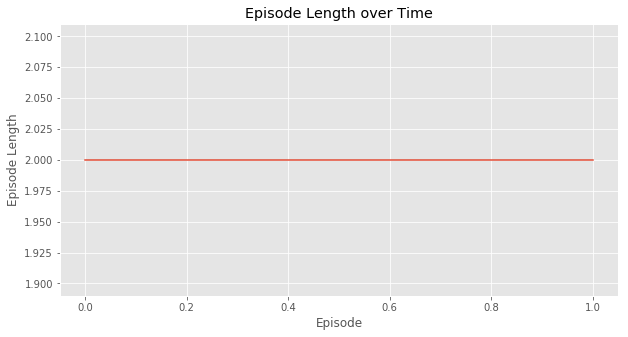

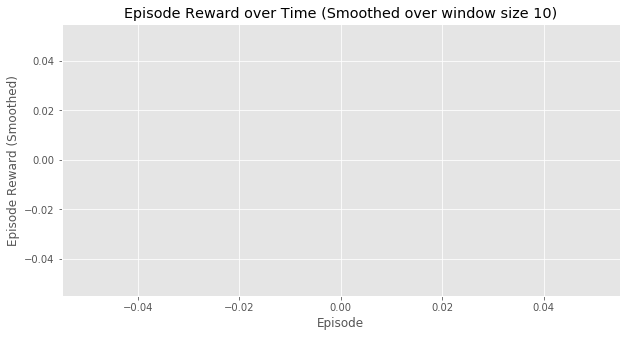

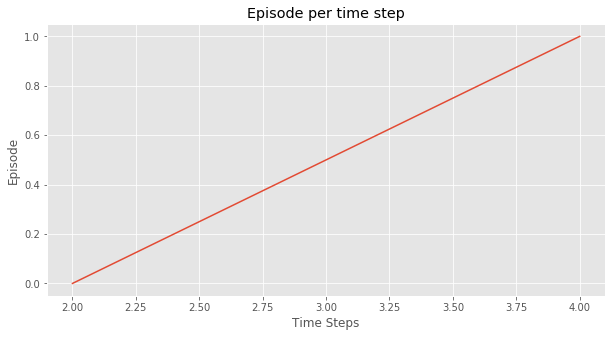

(<matplotlib.figure.Figure at 0x1a19ecf438>,
 <matplotlib.figure.Figure at 0x1a1a413e10>)

In [19]:
plotting.plot_episode_stats(stats, smoothing_window=10)

In [ ]:
stats

In [ ]:
isd = np.zeros(nS)

In [ ]:
isd.shape

In [ ]:
open_question_table = np.array([
                              ["open_yng_adult_life","open_yng_adult_car","open_yng_adult_dental","open_yng_adult_health","open_yng_adult_disability"],
                              ["open_middle-age_life","open_middle-age_car","open_middle-age_dental","open_middle-age_health","open_middle-age_disability"],
                              ["open_old-age_life","open_old-age_car","open_old-age_dental","open_old-age_health","open_old-age_disability"]
                               ])


In [ ]:
insured_pos_question_table = np.array([
                              ["insured_pos_yng_adult_life","insured_pos_yng_adult_car","insured_pos_yng_adult_dental","insured_pos_yng_adult_health","insured_pos_yng_adult_disability"],
                              ["insured_pos_middle-age_life","insured_pos_middle-age_car","insured_pos_middle-age_dental","insured_pos_middle-age_health","insured_pos_middle-age_disability"],
                              ["insured_pos_old-age_life","insured_pos_old-age_car","insured_pos_old-age_dental","insured_pos_old-age_health","insured_pos_old-age_disability"]
                               ])


In [ ]:
insured_neg_question_table = np.array([
                              ["insured_neg_yng_adult_life","insured_neg_yng_adult_car","insured_neg_yng_adult_dental","insured_neg_yng_adult_health","insured_neg_yng_adult_disability"],
                              ["insured_neg_middle-age_life","insured_neg_middle-age_car","insured_neg_middle-age_dental","insured_neg_middle-age_health","insured_neg_middle-age_disability"],
                              ["insured_neg_old-age_life","insured_neg_old-age_car","insured_neg_old-age_dental","insured_neg_old-age_health","insured_neg_old-age_disability"]
                               ])




In [ ]:
close = np.array(["Is the customer interested?"])

In [ ]:
def get_actions(open_question_table,insured_pos_question_table,insured_neg_question_table):
    
    action_dict = dict({"ask":{"young_adult": {val:idx for idx, val in enumerate(open_question_table[0])},
                "middle_age":{val:idx for idx, val in enumerate(open_question_table[1],len(open_question_table[1]))},
                "old-age":{val:idx for idx, val in enumerate(open_question_table[2],2*len(open_question_table[2]))}},
         "insured_pos":{"young_adult": {val:idx for idx, val in enumerate(insured_pos_question_table[0],3*len(insured_pos_question_table[2]))},
                "middle_age":{val:idx for idx, val in enumerate(insured_pos_question_table[1],4*len(insured_pos_question_table[1]))},
                "old-age":{val:idx for idx, val in enumerate(insured_pos_question_table[2],5*len(insured_pos_question_table[2]))}},
         "insured_neg":{"young_adult": {val:idx for idx, val in enumerate(insured_neg_question_table[0],6*len(insured_neg_question_table[0]))},
                "middle_age":{val:idx for idx, val in enumerate(insured_neg_question_table[1],7*len(insured_neg_question_table[1]))},
                "old-age":{val:idx for idx, val in enumerate(insured_neg_question_table[2],8*len(insured_neg_question_table[2]))}}})
    return action_dict
    

In [ ]:
dict({"ask":{"user_class1":q for q in list(open_question_table)[0:]}})

In [ ]:
{"open": {"open1":1}}

In [ ]:
a = dict({"ask":{"young_adult": {val:idx for idx, val in enumerate(open_question_table[0])},
                "middle_age":{val:idx for idx, val in enumerate(open_question_table[1],len(open_question_table[1]))},
                "old-age":{val:idx for idx, val in enumerate(open_question_table[2],2*len(open_question_table[2]))}},
         "insured_pos":{"young_adult": {val:idx for idx, val in enumerate(insured_pos_question_table[0],3*len(insured_pos_question_table[2]))},
                "middle_age":{val:idx for idx, val in enumerate(insured_pos_question_table[1],4*len(insured_pos_question_table[1]))},
                "old-age":{val:idx for idx, val in enumerate(insured_pos_question_table[2],5*len(insured_pos_question_table[2]))}},
         "insured_neg":{"young_adult": {val:idx for idx, val in enumerate(insured_neg_question_table[0],6*len(insured_neg_question_table[0]))},
                "middle_age":{val:idx for idx, val in enumerate(insured_neg_question_table[1],7*len(insured_neg_question_table[1]))},
                "old-age":{val:idx for idx, val in enumerate(insured_neg_question_table[2],8*len(insured_neg_question_table[2]))}}})

In [ ]:
a['ask']['middle_age']

In [ ]:
for idx, val in enumerate(open_question_table[0]):
    print(idx, val)

In [ ]:
a = np.random.choice([0,1], p=[0.5,0.5])
for i in range(100000):
    print(a)
    

In [ ]:
a

In [ ]:
a = get_action_dict(open_question_table,insured_pos_question_table,insured_neg_question_table)

In [ ]:
N_actions = 0
for key, value in a.items():
    for nestedkey,nestedvalue in a[key].items():
            N_actions = (len(a[key][nestedkey].items()) + N_actions)

#     N_actions = (len(a[key].items()) + N_actions)
print("No. actions:", N_actions)

In [ ]:
len(a['open']['young_adult'].items())

In [ ]:
t = get_action_dict(open_question_table,insured_pos_question_table,insured_neg_question_table)

In [ ]:
N_actions = 0
for key, value in t.items():
    for nestedkey,nestedvalue in t[key].items():
            N_actions = (len(t[key][nestedkey].items()) + N_actions)

print("No. actions:", N_actions)

In [ ]:
t

In [ ]:
import numpy as np
for i in range(1000):
    print(np.random.choice([0,1], p=[0.1,0.9]))

In [ ]:
a = np.array([0.3,0.5,0.6,0.34])

In [ ]:
actions = [1,2]

In [ ]:
a[actions]

In [ ]:
a = np.array([1,2,3,4,5])
np.argmax(a)

In [ ]:
N_actions = 0
action_string = []
action_values = []
for key, value in t.items():
    for nestedkey,nestedvalue in t[key].items():
        N_actions = (len(t[key][nestedkey].items()) + N_actions)
        action_values.append(list(t[key][nestedkey].values()))
        action_string.append(list(t[key][nestedkey].keys()))

In [ ]:
np.array(action_values)

In [ ]:
action_string

In [ ]:
a = pd.DataFrame(action_string)

In [ ]:
t

In [ ]:
a = pd.DataFrame.from_dict(t, orient='columns', dtype=None)

In [ ]:
a = pd.DataFrame(open_question_table)

In [ ]:
a = a.append(pd.Series(insured_neg_question_table))

In [27]:
all_q = np.append(open_question_table,insured_pos_question_table)

In [28]:
all_q = np.append(all_q,close)

In [29]:
all_q.shape

(31,)

In [30]:
a = pd.DataFrame(all_q)

In [ ]:
a.columns = ['Question']

In [ ]:
a['States'] = 'open'

In [ ]:
a['States'][15:45] = 'ask'

In [ ]:
a['States'][45] = 'close'

In [ ]:
a['ID'] = a.index

In [ ]:
a["user_class"][45] = 'all'

In [ ]:
i = np.array(['life','car','dental','health','disability'])

In [ ]:
j = np.append(j,i)

In [ ]:
j.shape

In [ ]:
j

In [ ]:
a['item_class'] = pd.Series(j)

In [ ]:
a

In [ ]:
df["B"] = df["A"].map(equiv)
equiv = {7001:1, 8001:2, 9001:3}

In [ ]:
equiv = {'life':0,'car':1,'dental':2,'health':3,'disability':4}

In [ ]:
a['item_class_id'] = a['item_class'].map(equiv)

In [ ]:
a.to_csv("actions.csv",index=False)

In [ ]:
action_map = a

In [ ]:
b = pd.read_csv("actions.csv")

In [ ]:
b

In [ ]:
len(a['ID'].values)

In [ ]:
a

In [ ]:
a[(a['States']=='open') & (a['user_class']=='young_adult')]['ID'][].values

In [ ]:
a.loc[((a['States'] == 'open')&(a['user_class'] == 'young_adult')), 'ID']

In [ ]:
a[a['ID']==5]['Question'].values

In [ ]:
 action = a[(a['States']=='close')]['ID'].values

In [ ]:
action

In [ ]:
np.random.randint(0,4, size=1)[0]

In [ ]:
action_map

In [ ]:
action_map[ (action_map['States']== 'close')]['ID'].values

In [3]:
action_map

,Question,States,ID,user_class,item_class,user_class_id,item_class_id
0,open_yng_adult_life,open,0,young_adult,life,0.0,0.0
1,open_yng_adult_car,open,1,young_adult,car,0.0,1.0
2,open_yng_adult_dental,open,2,young_adult,dental,0.0,2.0
3,open_yng_adult_health,open,3,young_adult,health,0.0,3.0
4,open_yng_adult_disability,open,4,young_adult,disability,0.0,4.0
5,open_middle-age_life,open,5,middle_age,life,1.0,0.0
6,open_middle-age_car,open,6,middle_age,car,1.0,1.0
7,open_middle-age_dental,open,7,middle_age,dental,1.0,2.0
8,open_middle-age_health,open,8,middle_age,health,1.0,3.0
9,open_middle-age_disability,open,9,middle_age,disability,1.0,4.0


In [7]:
probs = np.array([0.2,0.6,0.4,0.4,0.6,0.4])

In [8]:
allowedactions = np.array([2,5,1])

In [14]:
dicta = {0:300, 1:3000, 2:100}

In [15]:
 max(dicta.items(), key=operator.itemgetter(1))[0]

1

In [20]:
action_map

,Question,States,ID,user_class,item_class,user_class_id,item_class_id
0,open_yng_adult_life,open,0,young_adult,life,0.0,0.0
1,open_yng_adult_car,open,1,young_adult,car,0.0,1.0
2,open_yng_adult_dental,open,2,young_adult,dental,0.0,2.0
3,open_yng_adult_health,open,3,young_adult,health,0.0,3.0
4,open_yng_adult_disability,open,4,young_adult,disability,0.0,4.0
5,open_middle-age_life,open,5,middle_age,life,1.0,0.0
6,open_middle-age_car,open,6,middle_age,car,1.0,1.0
7,open_middle-age_dental,open,7,middle_age,dental,1.0,2.0
8,open_middle-age_health,open,8,middle_age,health,1.0,3.0
9,open_middle-age_disability,open,9,middle_age,disability,1.0,4.0


In [31]:
a

,0
0,open_yng_adult_life
1,open_yng_adult_car
2,open_yng_adult_dental
3,open_yng_adult_health
4,open_yng_adult_disability
5,open_middle-age_life
6,open_middle-age_car
7,open_middle-age_dental
8,open_middle-age_health
9,open_middle-age_disability


In [33]:
a.columns = ['questions']

In [34]:
a

,questions
0,open_yng_adult_life
1,open_yng_adult_car
2,open_yng_adult_dental
3,open_yng_adult_health
4,open_yng_adult_disability
5,open_middle-age_life
6,open_middle-age_car
7,open_middle-age_dental
8,open_middle-age_health
9,open_middle-age_disability


In [13]:

insured_pos_question_table = np.array([
                              "insured_pos_yng_adult_life1","insured_pos_yng_adult_life2","insured_pos_yng_adult_life3","insured_pos_yng_adult_life4","insured_pos_yng_adult_life5",
                                "insured_pos_yng_adult_car1","insured_pos_yng_adult_car2","insured_pos_yng_adult_car3","insured_pos_yng_adult_car4","insured_pos_yng_adult_car5",
                                "insured_pos_yng_adult_dental1","insured_pos_yng_adult_dental2","insured_pos_yng_adult_dental3","insured_pos_yng_adult_dental4","insured_pos_yng_adult_dental5",
                                "insured_pos_yng_adult_health1","insured_pos_yng_adult_health2","insured_pos_yng_adult_health3","insured_pos_yng_adult_health4","insured_pos_yng_adult_health5",
                                "insured_pos_yng_adult_disability1","insured_pos_yng_adult_disability2","insured_pos_yng_adult_disability3","insured_pos_yng_adult_disability4","insured_pos_yng_adult_disability5",
                                "insured_pos_middle-age_life1","insured_pos_middle-age_life2","insured_pos_middle-age_life3","insured_pos_middle-age_life4","insured_pos_middle-age_life5",
                                "insured_pos_middle-age_car1","insured_pos_middle-age_car2","insured_pos_middle-age_car3","insured_pos_middle-age_car4","insured_pos_middle-age_car5",
                                "insured_pos_middle-age_dental1","insured_pos_middle-age_dental2","insured_pos_middle-age_dental3","insured_pos_middle-age_dental4","insured_pos_middle-age_dental5",
                                "insured_pos_middle-age_health1","insured_pos_middle-age_health2","insured_pos_middle-age_health3","insured_pos_middle-age_health4","insured_pos_middle-age_health5",
                                "insured_pos_middle-age_disability1","insured_pos_middle-age_disability2","insured_pos_middle-age_disability3","insured_pos_middle-age_disability4","insured_pos_middle-age_disability5",
                                "insured_pos_old-age_life1","insured_pos_old-age_life2","insured_pos_old-age_life3","insured_pos_old-age_life4","insured_pos_old-age_life5",
                                "insured_pos_old-age_car1","insured_pos_old-age_car2","insured_pos_old-age_car3","insured_pos_old-age_car4","insured_pos_old-age_car5",
                                "insured_pos_old-age_dental1","insured_pos_old-age_dental2","insured_pos_old-age_dental3","insured_pos_old-age_dental4","insured_pos_old-age_dental5",
                                "insured_pos_old-age_health1","insured_pos_old-age_health2","insured_pos_old-age_health3","insured_pos_old-age_health4","insured_pos_old-age_health5",
                                "insured_pos_old-age_disability1","insured_pos_old-age_disability2","insured_pos_old-age_disability3","insured_pos_old-age_disability4","insured_pos_old-age_disability5"
                                    ])

open_question_table = np.array([
                            "open_yng_adult_life1","open_yng_adult_life2","open_yng_adult_life3","open_yng_adult_life4","open_yng_adult_life5",
                            "open_yng_adult_car1","open_yng_adult_car2","open_yng_adult_car3","open_yng_adult_car4","open_yng_adult_car5",
                            "open_yng_adult_dental1","open_yng_adult_dental2","open_yng_adult_dental3","open_yng_adult_dental4","open_yng_adult_dental5",
                            "open_yng_adult_health1","open_yng_adult_health2","open_yng_adult_health3","open_yng_adult_health4","open_yng_adult_health5",
                            "open_yng_adult_disability1","open_yng_adult_disability2","open_yng_adult_disability3","open_yng_adult_disability4","open_yng_adult_disability5",
                            "open_middle-age_life1","open_middle-age_life2","open_middle-age_life3","open_middle-age_life4","open_middle-age_life5",
                            "open_middle-age_car1","open_middle-age_car2","open_middle-age_car3","open_middle-age_car4","open_middle-age_car5",
                            "open_middle-age_dental1","open_middle-age_dental2","open_middle-age_dental3","open_middle-age_dental4","open_middle-age_dental5",
                            "open_middle-age_health1","open_middle-age_health2","open_middle-age_health3","open_middle-age_health4","open_middle-age_health5",
                            "open_middle-age_disability1","open_middle-age_disability2","open_middle-age_disability3","open_middle-age_disability4","open_middle-age_disability5",
                            "open_old-age_life1","open_old-age_life2","open_old-age_life3","open_old-age_life4","open_old-age_life5",
                            "open_old-age_car1","open_old-age_car2","open_old-age_car3","open_old-age_car4","open_old-age_car5",
                            "open_old-age_dental1","open_old-age_dental2","open_old-age_dental3","open_old-age_dental4","open_old-age_dental5",
                            "open_old-age_health1","open_old-age_health2","open_old-age_health3","open_old-age_health4","open_old-age_health5",
                            "open_old-age_disability1","open_old-age_disability2","open_old-age_disability3","open_old-age_disability4","open_old-age_disability5"
                               ])
close = np.array(["Is the Customer Interested1?","Is the Customer Interested2?","Is the Customer Interested3?","Is the Customer Interested4?","Is the Customer Interested5?"])

In [14]:
all_q = np.append(open_question_table,insured_pos_question_table)

In [18]:
len(open_question_table)

75

In [15]:
all_q = np.append(all_q,close)

In [19]:
all_q.shape

(155,)

In [20]:
len(a)

155

In [9]:
a.columns = ['question']

In [37]:
a[149:999]

,0,state
149,insured_pos_old-age_disability5,ask
150,Is the Customer Interested1?,close
151,Is the Customer Interested2?,close
152,Is the Customer Interested3?,close
153,Is the Customer Interested4?,close
154,Is the Customer Interested5?,close


In [12]:
len(insured_pos_question_table)

75

In [24]:
a['state'] = 'open'

In [28]:
a['state'][75:150] = 'ask'

In [30]:
a['state'][150:155] = 'close'

In [38]:
a

,0,state
0,open_yng_adult_life1,open
1,open_yng_adult_life2,open
2,open_yng_adult_life3,open
3,open_yng_adult_life4,open
4,open_yng_adult_life5,open
5,open_yng_adult_car1,open
6,open_yng_adult_car2,open
7,open_yng_adult_car3,open
8,open_yng_adult_car4,open
9,open_yng_adult_car5,open


In [39]:
a.columns = ['question','state']

In [41]:
a['qid'] = a.index

In [43]:
action_map = pd.read_csv("actions.csv")

In [44]:
action_map

,Question,States,ID,user_class,item_class,user_class_id,item_class_id
0,open_yng_adult_life,open,0,young_adult,life,0.0,0.0
1,open_yng_adult_car,open,1,young_adult,car,0.0,1.0
2,open_yng_adult_dental,open,2,young_adult,dental,0.0,2.0
3,open_yng_adult_health,open,3,young_adult,health,0.0,3.0
4,open_yng_adult_disability,open,4,young_adult,disability,0.0,4.0
5,open_middle-age_life,open,5,middle_age,life,1.0,0.0
6,open_middle-age_car,open,6,middle_age,car,1.0,1.0
7,open_middle-age_dental,open,7,middle_age,dental,1.0,2.0
8,open_middle-age_health,open,8,middle_age,health,1.0,3.0
9,open_middle-age_disability,open,9,middle_age,disability,1.0,4.0


In [46]:
a['user_class'] = 'young_adult'

In [58]:
a['user_class'][150:155] = 'all'

/Users/shishir/anaconda3/envs/BotconnectSalesAI/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
a['user_class_id'][a['user_class'] == 'old_age'] = 2 

/Users/shishir/anaconda3/envs/BotconnectSalesAI/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
a

,question,state,qid,user_class,user_class_id
0,open_yng_adult_life1,open,0,young_adult,0
1,open_yng_adult_life2,open,1,young_adult,0
2,open_yng_adult_life3,open,2,young_adult,0
3,open_yng_adult_life4,open,3,young_adult,0
4,open_yng_adult_life5,open,4,young_adult,0
5,open_yng_adult_car1,open,5,young_adult,0
6,open_yng_adult_car2,open,6,young_adult,0
7,open_yng_adult_car3,open,7,young_adult,0
8,open_yng_adult_car4,open,8,young_adult,0
9,open_yng_adult_car5,open,9,young_adult,0


In [69]:
a['user_class_id'][a['state'] == "close"] = None

/Users/shishir/anaconda3/envs/BotconnectSalesAI/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
a['user_class_id'][a['state'] == "close"]

150   NaN
151   NaN
152   NaN
153   NaN
154   NaN
Name: user_class_id, dtype: float64

In [73]:
a[50:150]

,question,state,qid,user_class,user_class_id
50,open_old-age_life1,open,50,old_age,2.0
51,open_old-age_life2,open,51,old_age,2.0
52,open_old-age_life3,open,52,old_age,2.0
53,open_old-age_life4,open,53,old_age,2.0
54,open_old-age_life5,open,54,old_age,2.0
55,open_old-age_car1,open,55,old_age,2.0
56,open_old-age_car2,open,56,old_age,2.0
57,open_old-age_car3,open,57,old_age,2.0
58,open_old-age_car4,open,58,old_age,2.0
59,open_old-age_car5,open,59,old_age,2.0


In [150]:
equiv = {'life':0,'car':1,'dental':2,'health':3,'disability':4}
a['item_class_id'] = a['item_class'].map(equiv)

In [136]:
i = np.array(['life','life','life','life','life',
              'car','car','car','car','car',
              'dental','dental','dental','dental','dental',
              'health','health','health','health','health',
              'disability','disability','disability','disability','disability'
             ])

In [143]:
j = np.append(j,i)

In [144]:
j.shape

(150,)

In [147]:
a['item_class'][0:150] = j

/Users/shishir/anaconda3/envs/BotconnectSalesAI/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [148]:
a['item_class'][150:155] = None

/Users/shishir/anaconda3/envs/BotconnectSalesAI/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
a

,question,state,qid,user_class,user_class_id,item_class
0,open_yng_adult_life1,open,0,young_adult,0.0,life
1,open_yng_adult_life2,open,1,young_adult,0.0,life
2,open_yng_adult_life3,open,2,young_adult,0.0,life
3,open_yng_adult_life4,open,3,young_adult,0.0,life
4,open_yng_adult_life5,open,4,young_adult,0.0,life
5,open_yng_adult_car1,open,5,young_adult,0.0,car
6,open_yng_adult_car2,open,6,young_adult,0.0,car
7,open_yng_adult_car3,open,7,young_adult,0.0,car
8,open_yng_adult_car4,open,8,young_adult,0.0,car
9,open_yng_adult_car5,open,9,young_adult,0.0,car


In [126]:
a = a.drop('item_class', 1)

In [127]:
a

,question,state,qid,user_class,user_class_id
0,open_yng_adult_life1,open,0,young_adult,0.0
1,open_yng_adult_life2,open,1,young_adult,0.0
2,open_yng_adult_life3,open,2,young_adult,0.0
3,open_yng_adult_life4,open,3,young_adult,0.0
4,open_yng_adult_life5,open,4,young_adult,0.0
5,open_yng_adult_car1,open,5,young_adult,0.0
6,open_yng_adult_car2,open,6,young_adult,0.0
7,open_yng_adult_car3,open,7,young_adult,0.0
8,open_yng_adult_car4,open,8,young_adult,0.0
9,open_yng_adult_car5,open,9,young_adult,0.0


In [151]:
a


,question,state,qid,user_class,user_class_id,item_class,item_class_id
0,open_yng_adult_life1,open,0,young_adult,0.0,life,0.0
1,open_yng_adult_life2,open,1,young_adult,0.0,life,0.0
2,open_yng_adult_life3,open,2,young_adult,0.0,life,0.0
3,open_yng_adult_life4,open,3,young_adult,0.0,life,0.0
4,open_yng_adult_life5,open,4,young_adult,0.0,life,0.0
5,open_yng_adult_car1,open,5,young_adult,0.0,car,1.0
6,open_yng_adult_car2,open,6,young_adult,0.0,car,1.0
7,open_yng_adult_car3,open,7,young_adult,0.0,car,1.0
8,open_yng_adult_car4,open,8,young_adult,0.0,car,1.0
9,open_yng_adult_car5,open,9,young_adult,0.0,car,1.0


In [154]:
a.to_csv("actions_new.csv", index=False)

In [155]:
a

,question,state,qid,user_class,user_class_id,item_class,item_class_id
0,open_yng_adult_life1,open,0,young_adult,0.0,life,0.0
1,open_yng_adult_life2,open,1,young_adult,0.0,life,0.0
2,open_yng_adult_life3,open,2,young_adult,0.0,life,0.0
3,open_yng_adult_life4,open,3,young_adult,0.0,life,0.0
4,open_yng_adult_life5,open,4,young_adult,0.0,life,0.0
5,open_yng_adult_car1,open,5,young_adult,0.0,car,1.0
6,open_yng_adult_car2,open,6,young_adult,0.0,car,1.0
7,open_yng_adult_car3,open,7,young_adult,0.0,car,1.0
8,open_yng_adult_car4,open,8,young_adult,0.0,car,1.0
9,open_yng_adult_car5,open,9,young_adult,0.0,car,1.0


In [156]:
a['item_class'][150:155] = None

/Users/shishir/anaconda3/envs/BotconnectSalesAI/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
a

,question,state,qid,user_class,user_class_id,item_class,item_class_id
0,open_yng_adult_life1,open,0,young_adult,0.0,life,0.0
1,open_yng_adult_life2,open,1,young_adult,0.0,life,0.0
2,open_yng_adult_life3,open,2,young_adult,0.0,life,0.0
3,open_yng_adult_life4,open,3,young_adult,0.0,life,0.0
4,open_yng_adult_life5,open,4,young_adult,0.0,life,0.0
5,open_yng_adult_car1,open,5,young_adult,0.0,car,1.0
6,open_yng_adult_car2,open,6,young_adult,0.0,car,1.0
7,open_yng_adult_car3,open,7,young_adult,0.0,car,1.0
8,open_yng_adult_car4,open,8,young_adult,0.0,car,1.0
9,open_yng_adult_car5,open,9,young_adult,0.0,car,1.0
